# Proyek Analisis Data: Chocolate Sales
- **Nama:** Aditya Eka Narayan
- **Email:** eka255765@gmail.com


## Menentukan Pertanyaan Bisnis

- Siapa sales person dengan total penjualan tertinggi?
- Bagaimana perbandingan total penjualan antar negara?
- Bagaimana tren penjualan bulanan sepanjang tahun?
- Produk cokelat mana yang paling laris berdasarkan jumlah kotak yang dikirim?
- Produk mana yang memberikan pendapatan tertinggi?
- Negara mana yang memiliki rata-rata pengiriman terbanyak per transaksi?



## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
Choco_df = pd.read_csv("Chocolate Sales.csv") # untuk membaca file day.csv
print("==== 5 Baris Teratas Dataset ====")
print(Choco_df.head()) # menampilkan data 5 kebawah

==== 5 Baris Teratas Dataset ====
     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


**Insight:**
- Kita dapat melihat 5 data ke bawah tentang data-set

### Assessing Data

In [ ]:
print("\n==== Informasi Dataset ====")
Choco_df.info()
# untuk melihat infromasi dari file day


==== Informasi Dataset ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [ ]:
print("\n==== Jumlah Missing Values ====")
Choco_df.isna().sum()
# untuk melihat missing value pada data day


==== Jumlah Missing Values ====


,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [ ]:
print("Jumlah Dupilkasi = ", Choco_df.duplicated().sum())
# untuk melihat jumlah duplikasi pada sebuah data

Jumlah Dupilkasi =  0


Outliers in Choco_df :  {'Amount': 16}


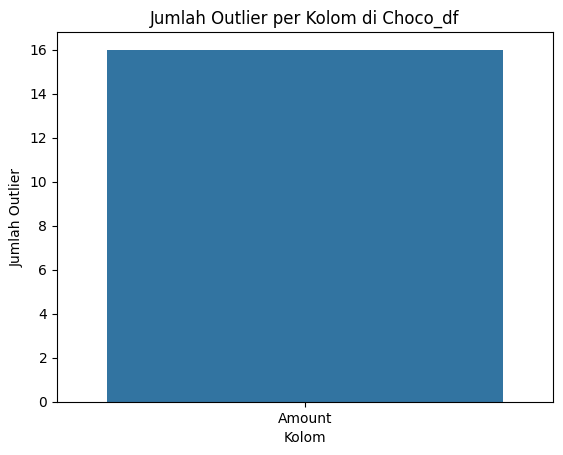

In [ ]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(data):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < minimum or x > maximum]
    return outliers, minimum, maximum

# Pastikan kolom 'Amount' dikonversi ke numerik
Choco_df['Amount'] = Choco_df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Pilih kolom numerik yang ingin diperiksa
numeric_cols = ["Amount"]  # Ganti dengan kolom numerik lainnya jika diperlukan

# Deteksi outlier untuk dataset Choco_df
outliers_choco = {col: detect_outliers_iqr(Choco_df[col])[0] for col in numeric_cols}

# Hitung jumlah outlier per kolom
outliers_count_choco = {col: len(outliers_choco[col]) for col in numeric_cols}

print("Outliers in Choco_df : ", outliers_count_choco)

# Data untuk bar plot
kolom = list(outliers_count_choco.keys())
jumlah_outlier = list(outliers_count_choco.values())

# Membuat bar plot menggunakan Seaborn
sns.barplot(x=kolom, y=jumlah_outlier)

# Menambahkan label dan judul
plt.xlabel("Kolom")
plt.ylabel("Jumlah Outlier")
plt.title("Jumlah Outlier per Kolom di Choco_df")

# Menampilkan bar plot
plt.show()

**Insight:**
- Kita bisa melihat bahwa data Choco itu sudah bersih
- Informasi Tambahan kita juga bisa melihat outlier dari data Choco, tetapi saya tidak hapus karena banyak mengandung informasi penting


### Cleaning Data

In [ ]:
# mengubah format dteday menjadi datetime
Choco_df["Date"] = pd.to_datetime(Choco_df["Date"])

print("\n==== Informasi Dataset ====")
Choco_df.info()
# untuk melihat infromasi dari file day


==== Informasi Dataset ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


**Insight:**
- Saya tidak melakukan cleaning apapun karena data sudah bersih
- Saya melakukan perubahan object dengan menggantinya menjadi date-time

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
result_Choco = Choco_df.groupby("Country").agg({
    "Boxes Shipped" : "nunique",  # Menghitung jumlah tanggal unik (analogi dari hari)
    "Amount": ["max", "min", "mean", "std"]  # Statistik untuk jumlah penjualan
})

print("===== Agregasi Data Choco berdasarkan Country =====")
print(result_Choco)

===== Agregasi Data Choco berdasarkan Country =====
            Boxes Shipped   Amount                                 
                  nunique      max    min         mean          std
Country                                                            
Australia             156  19453.0   63.0  5548.131707  3800.387283
Canada                148  16793.0  210.0  5502.280000  3888.961411
India                 140  22050.0   28.0  5683.695652  4362.832078
New Zealand           134  19481.0    7.0  5493.745665  3942.993373
UK                    145  18991.0    7.0  5908.943820  4176.176290
USA                   142  17465.0   70.0  5784.072626  4464.216399


In [ ]:
# Kode asli Anda
produk_terlaris_per_negara = Choco_df.groupby(['Country', 'Product'])[['Boxes Shipped', 'Amount']].sum().reset_index()  # Ubah bagian ini
produk_terlaris_per_negara = produk_terlaris_per_negara.loc[produk_terlaris_per_negara.groupby('Country')['Boxes Shipped'].idxmax()]

# Menghapus baris yang tidak diinginkan
countries_to_keep = ['Australia', 'Canada', 'India', 'New Zealand', 'UK', 'USA']
produk_terlaris_per_negara = produk_terlaris_per_negara[produk_terlaris_per_negara['Country'].isin(countries_to_keep)]

# Mengurutkan berdasarkan Boxes Shipped (descending)
produk_terlaris_per_negara = produk_terlaris_per_negara.sort_values(by=['Boxes Shipped'], ascending=False)

# Mengatur ulang indeks
produk_terlaris_per_negara = produk_terlaris_per_negara.reset_index(drop=True)
produk_terlaris_per_negara.index = produk_terlaris_per_negara.index + 1

# Format Amount menjadi Dolar  # Tambahkan bagian ini
produk_terlaris_per_negara['Amount'] = produk_terlaris_per_negara['Amount'].apply(lambda x: f"${x:,.0f}")

print("===== Produk Cokelat Terlaris per Negara =====")
print(produk_terlaris_per_negara[['Country', 'Product', 'Boxes Shipped', 'Amount']])  # Ubah bagian ini

===== Produk Cokelat Terlaris per Negara =====
       Country               Product  Boxes Shipped   Amount
1    Australia        50% Dark Bites           3182  $89,222
2  New Zealand       Mint Chip Choco           2537  $86,709
3       Canada  Choco Coated Almonds           2452  $57,463
4           UK             Milk Bars           2251  $57,036
5          USA      Fruit & Nut Bars           2061  $48,377
6        India   Spicy Special Slims           2037  $75,495


In [ ]:
# Mengelompokkan data berdasarkan Sales Person dan menjumlahkan Boxes Shipped
sales_person_total_boxes = Choco_df.groupby('Sales Person')['Boxes Shipped'].sum().reset_index()

# Mengurutkan data berdasarkan Boxes Shipped secara menurun
sales_person_total_boxes = sales_person_total_boxes.sort_values(by=['Boxes Shipped'], ascending=False)

# Mengatur ulang indeks
sales_person_total_boxes = sales_person_total_boxes.reset_index(drop=True)
sales_person_total_boxes.index = sales_person_total_boxes.index + 1

# Menampilkan tabel
print("===== Sales Person yang Paling Banyak Membeli Produk Cokelat (berdasarkan Boxes Shipped) =====")
print(sales_person_total_boxes)

===== Sales Person yang Paling Banyak Membeli Produk Cokelat (berdasarkan Boxes Shipped) =====
           Sales Person  Boxes Shipped
1      Karlen McCaffrey           9658
2        Beverie Moffet           9214
3   Dennison Crosswaite           8767
4         Kelci Walkden           8702
5            Oby Sorrel           8608
6           Brien Boise           8102
7        Marney O'Breen           8043
8          Jan Morforth           7661
9          Ches Bonnell           7522
10      Madelene Upcott           7279
11          Kaine Padly           7253
12       Jehu Rudeforth           7246
13       Curtice Advani           7074
14      Roddy Speechley           6899
15       Dotty Strutley           6853
16          Van Tuxwell           6799
17      Gunar Cockshoot           6677
18       Andria Kimpton           6448
19         Barr Faughny           6366
20         Gigi Bohling           6303
21       Mallorie Waber           5980
22         Husein Augar           5849
23      

In [ ]:
# Mengelompokkan data berdasarkan Sales Person dan menjumlahkan Amount
sales_person_total_amount = Choco_df.groupby('Sales Person')['Amount'].sum().reset_index()

# Mengurutkan data berdasarkan Amount secara menurun
sales_person_total_amount = sales_person_total_amount.sort_values(by=['Amount'], ascending=False)

# Mengatur ulang indeks
sales_person_total_amount = sales_person_total_amount.reset_index(drop=True)
sales_person_total_amount.index = sales_person_total_amount.index + 1

# Mengubah format Amount menjadi Dolar
sales_person_total_amount['Amount'] = sales_person_total_amount['Amount'].apply(lambda x: f"${x:,.0f}")

# Menampilkan tabel
print("===== Sales Person dengan Total Penjualan Tertinggi (berdasarkan Amount) =====")
print(sales_person_total_amount)

===== Sales Person dengan Total Penjualan Tertinggi (berdasarkan Amount) =====
           Sales Person    Amount
1          Ches Bonnell  $320,901
2            Oby Sorrel  $316,645
3       Madelene Upcott  $316,099
4           Brien Boise  $312,816
5         Kelci Walkden  $311,710
6           Van Tuxwell  $303,149
7   Dennison Crosswaite  $291,669
8        Beverie Moffet  $278,922
9           Kaine Padly  $266,490
10       Marney O'Breen  $259,742
11         Barr Faughny  $258,713
12      Roddy Speechley  $251,062
13      Gunar Cockshoot  $238,483
14         Gigi Bohling  $232,666
15     Karlen McCaffrey  $223,895
16       Jehu Rudeforth  $220,976
17         Jan Morforth  $219,667
18       Curtice Advani  $216,461
19  Rafaelita Blaksland  $210,245
20         Husein Augar  $205,212
21       Andria Kimpton  $201,747
22       Mallorie Waber  $200,592
23       Camilla Castle  $196,616
24       Dotty Strutley  $190,624
25       Wilone O'Kielt  $138,523


In [ ]:
# Mengelompokkan data berdasarkan produk dan menjumlahkan 'Boxes Shipped'
produk_terlaris = Choco_df.groupby('Product')['Boxes Shipped'].sum().reset_index()

# Mengurutkan data berdasarkan 'Boxes Shipped' secara menurun
produk_terlaris = produk_terlaris.sort_values(by=['Boxes Shipped'], ascending=False)

# Mengatur ulang indeks
produk_terlaris = produk_terlaris.reset_index(drop=True)
produk_terlaris.index = produk_terlaris.index + 1

# Menampilkan hasil dengan format yang lebih baik
print("===== Daftar Produk Cokelat Terlaris (berdasarkan Boxes Shipped) =====")
print(produk_terlaris)


===== Daftar Produk Cokelat Terlaris (berdasarkan Boxes Shipped) =====
                 Product  Boxes Shipped
1         50% Dark Bites           9792
2     Smooth Sliky Salty           8810
3                Eclairs           8757
4   Caramel Stuffed Bars           8717
5    Spicy Special Slims           8685
6          Drinking Coco           8660
7              Milk Bars           8330
8    Peanut Butter Cubes           8304
9            After Nines           8257
10            White Choc           8240
11       Mint Chip Choco           8207
12       99% Dark & Pure           8127
13        70% Dark Bites           8015
14         85% Dark Bars           7793
15    Manuka Honey Choco           7781
16   Organic Choco Syrup           7749
17      Fruit & Nut Bars           7738
18          Orange Choco           7732
19       Raspberry Choco           7115
20   Baker's Choco Chips           6998
21          Almond Choco           6736
22  Choco Coated Almonds           6464


In [ ]:
# Mengelompokkan data berdasarkan produk dan menjumlahkan 'Amount'
produk_terlaris_amount = Choco_df.groupby('Product')['Amount'].sum().reset_index()

# Mengurutkan data berdasarkan 'Amount' secara menurun
produk_terlaris_amount = produk_terlaris_amount.sort_values(by=['Amount'], ascending=False)

# Mengatur ulang indeks
produk_terlaris_amount = produk_terlaris_amount.reset_index(drop=True)
produk_terlaris_amount.index = produk_terlaris_amount.index + 1

# Mengubah format Amount menjadi Dolar
produk_terlaris_amount['Amount'] = produk_terlaris_amount['Amount'].apply(lambda x: f"${x:,.0f}")

# Menampilkan hasil dengan format yang lebih baik
print("===== Daftar Produk Cokelat dengan Penjualan Tertinggi (berdasarkan Amount) =====")
print(produk_terlaris_amount)

===== Daftar Produk Cokelat dengan Penjualan Tertinggi (berdasarkan Amount) =====
                 Product    Amount
1     Smooth Sliky Salty  $349,692
2         50% Dark Bites  $341,712
3             White Choc  $329,147
4    Peanut Butter Cubes  $324,842
5                Eclairs  $312,445
6        99% Dark & Pure  $299,796
7          85% Dark Bars  $299,229
8    Organic Choco Syrup  $294,700
9    Spicy Special Slims  $293,454
10       Mint Chip Choco  $283,969
11          Almond Choco  $277,536
12    Manuka Honey Choco  $275,541
13             Milk Bars  $269,248
14       Raspberry Choco  $264,740
15           After Nines  $261,331
16      Fruit & Nut Bars  $259,147
17         Drinking Coco  $256,655
18          Orange Choco  $256,144
19   Baker's Choco Chips  $249,613
20  Choco Coated Almonds  $241,486
21  Caramel Stuffed Bars  $231,588
22        70% Dark Bites  $211,610


In [ ]:
Choco_df.describe(include="all")

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,1094,1094,1094,1094,1094.000000,1094.000000
unique,25,6,22,NaN,NaN,NaN
top,Kelci Walkden,Australia,50% Dark Bites,NaN,NaN,NaN
freq,54,205,60,NaN,NaN,NaN
mean,NaN,NaN,NaN,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,NaN,NaN,NaN,2022-01-03 00:00:00,7.000000,1.000000
25%,NaN,NaN,NaN,2022-03-02 00:00:00,2390.500000,70.000000
50%,NaN,NaN,NaN,2022-05-11 00:00:00,4868.500000,135.000000
75%,NaN,NaN,NaN,2022-07-04 00:00:00,8027.250000,228.750000
max,NaN,NaN,NaN,2022-08-31 00:00:00,22050.000000,709.000000


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Siapa sales person dengan total penjualan tertinggi?

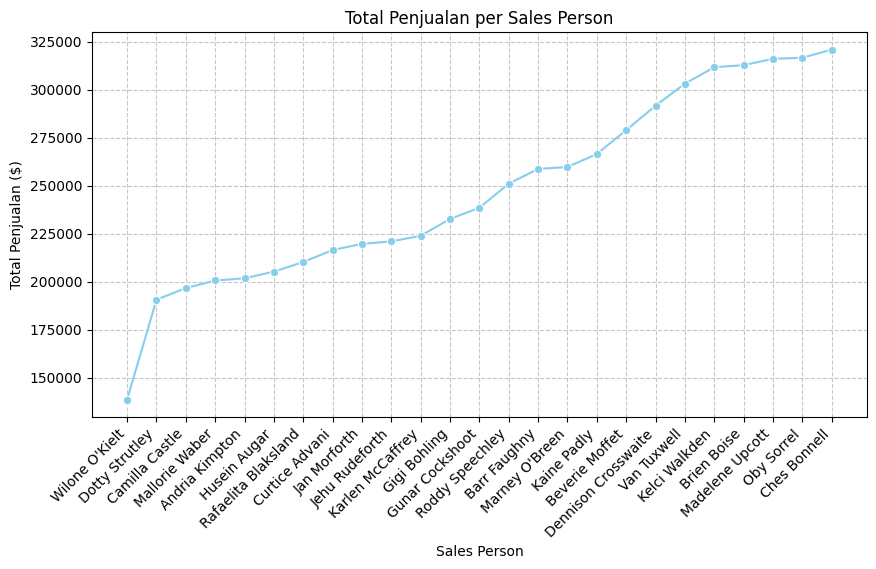

In [ ]:
# Mengelompokkan data berdasarkan Sales Person dan menjumlahkan Amount
sales_person_total_amount = Choco_df.groupby('Sales Person')['Amount'].sum().reset_index()

# Mengurutkan data berdasarkan Amount secara ascending
sales_person_total_amount = sales_person_total_amount.sort_values(by=['Amount'], ascending=True)

# Reset index
sales_person_total_amount = sales_person_total_amount.reset_index(drop=True)

# Membuat line plot
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot
sns.lineplot(x=sales_person_total_amount.index, y=sales_person_total_amount['Amount'], marker='o', color='skyblue')

# Menyesuaikan label sumbu x
plt.xticks(ticks=sales_person_total_amount.index, labels=sales_person_total_amount['Sales Person'], rotation=45, ha='right')

# Menambahkan judul dan label
plt.title("Total Penjualan per Sales Person")
plt.xlabel("Sales Person")
plt.ylabel("Total Penjualan ($)")
plt.grid(True, linestyle='--', alpha=0.7)  # Menambahkan grid ringan

# Menampilkan plot
plt.show()


### Pertanyaan 2: Bagaimana perbandingan total penjualan antar negara?

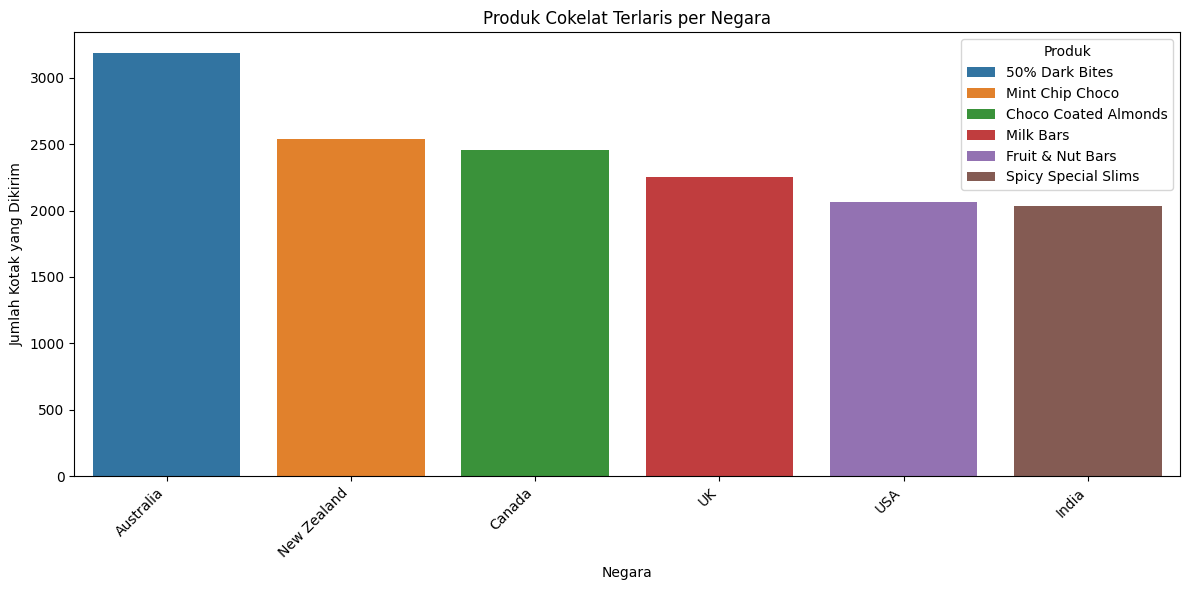

In [ ]:
# Kode asli Anda
produk_terlaris_per_negara = Choco_df.groupby(['Country', 'Product'])[['Boxes Shipped', 'Amount']].sum().reset_index()  # Ubah bagian ini
produk_terlaris_per_negara = produk_terlaris_per_negara.loc[produk_terlaris_per_negara.groupby('Country')['Boxes Shipped'].idxmax()]

# Menghapus baris yang tidak diinginkan
countries_to_keep = ['Australia', 'Canada', 'India', 'New Zealand', 'UK', 'USA']
produk_terlaris_per_negara = produk_terlaris_per_negara[produk_terlaris_per_negara['Country'].isin(countries_to_keep)]

# Mengurutkan berdasarkan Boxes Shipped (descending)
produk_terlaris_per_negara = produk_terlaris_per_negara.sort_values(by=['Boxes Shipped'], ascending=False)

# Mengatur ulang indeks
produk_terlaris_per_negara = produk_terlaris_per_negara.reset_index(drop=True)
produk_terlaris_per_negara.index = produk_terlaris_per_negara.index + 1

# Format Amount menjadi Dolar  # Tambahkan bagian ini
produk_terlaris_per_negara['Amount'] = produk_terlaris_per_negara['Amount'].apply(lambda x: f"${x:,.0f}")

plt.figure(figsize=(12, 6))
# The following lines were incorrectly indented
sns.barplot(x='Country', y='Boxes Shipped', hue='Product', data=produk_terlaris_per_negara)
plt.title('Produk Cokelat Terlaris per Negara')
plt.xlabel('Negara')
plt.ylabel('Jumlah Kotak yang Dikirim')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Produk', loc='upper right')
plt.tight_layout()
plt.show()

### Pertanyaan 3 : Bagaimana tren penjualan bulanan sepanjang tahun?

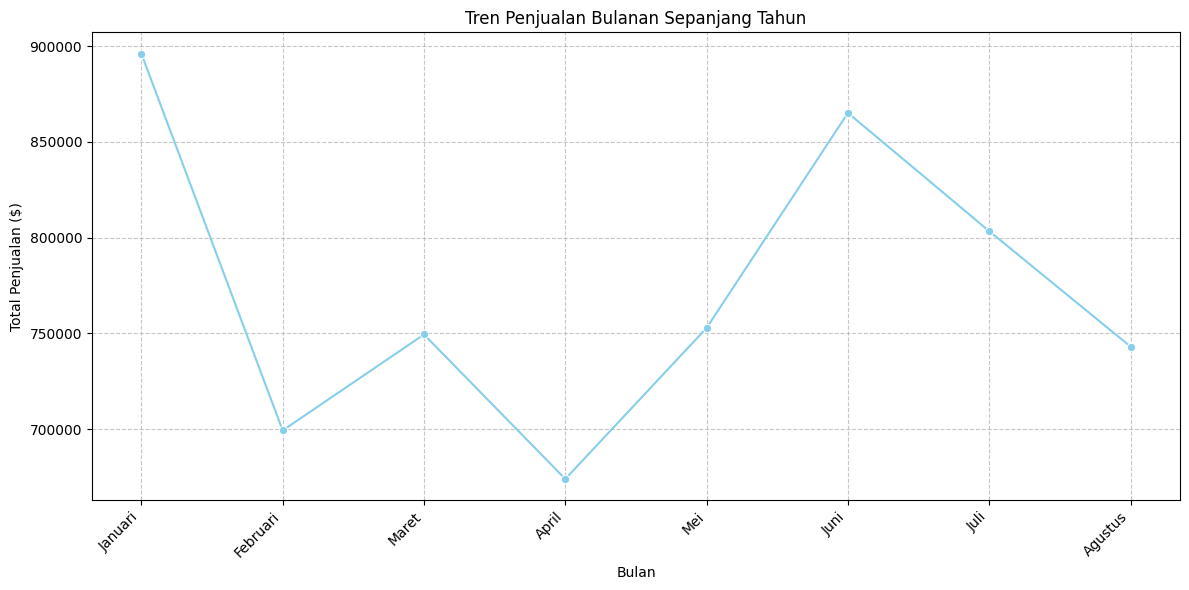

In [ ]:
# Pastikan kolom 'Date' sudah dalam format datetime
Choco_df['Date'] = pd.to_datetime(Choco_df['Date'])

# Mengelompokkan data berdasarkan bulan dan menjumlahkan total penjualan
monthly_sales = Choco_df.groupby(Choco_df['Date'].dt.month)['Amount'].sum().reset_index()

# Mengganti angka bulan dengan nama bulan
month_names = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}
monthly_sales['Date'] = monthly_sales['Date'].map(month_names)

# Membuat line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Amount', data=monthly_sales, marker='o', color='skyblue')
plt.title('Tren Penjualan Bulanan Sepanjang Tahun')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 4 : Produk cokelat mana yang paling laris berdasarkan jumlah kotak yang dikirim?

<ipython-input-108-5c1ca4a942a7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Boxes Shipped', data=produk_terlaris, palette='viridis')


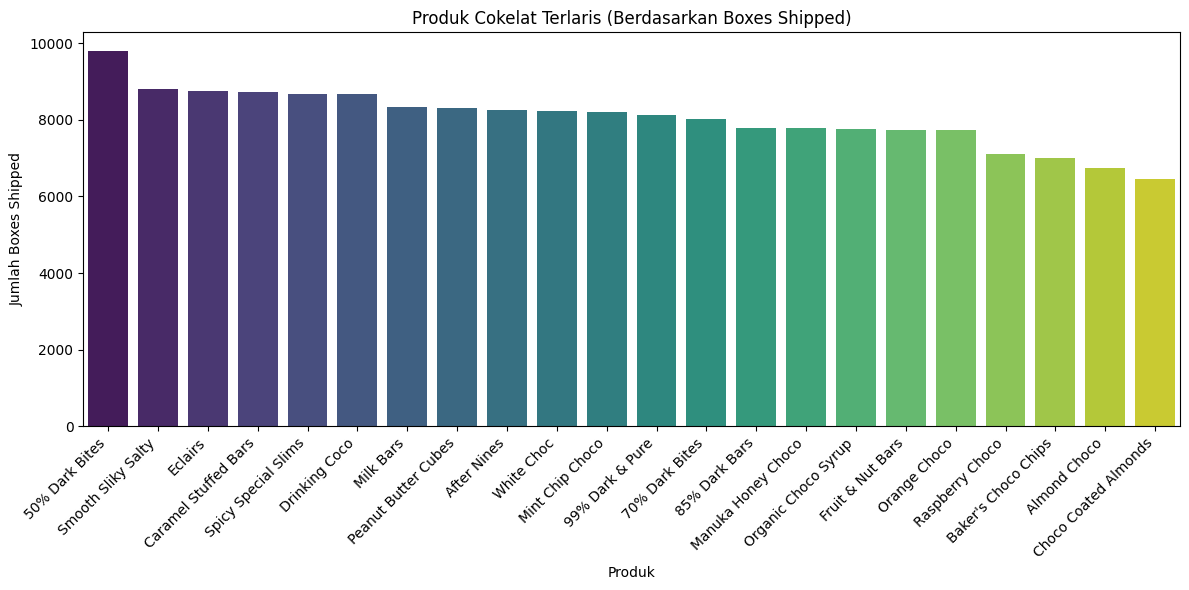

In [ ]:
# Mengelompokkan data berdasarkan produk dan menjumlahkan 'Boxes Shipped'
produk_terlaris = Choco_df.groupby('Product')['Boxes Shipped'].sum().reset_index()

# Mengurutkan data berdasarkan 'Boxes Shipped' secara menurun
produk_terlaris = produk_terlaris.sort_values(by=['Boxes Shipped'], ascending=False)

# Mengatur ulang indeks
produk_terlaris = produk_terlaris.reset_index(drop=True)
produk_terlaris.index = produk_terlaris.index + 1

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Boxes Shipped', data=produk_terlaris, palette='viridis')
plt.title('Produk Cokelat Terlaris (Berdasarkan Boxes Shipped)')
plt.xlabel('Produk')
plt.ylabel('Jumlah Boxes Shipped')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()

### Pertanyaan 5 : Produk mana yang memberikan pendapatan tertinggi?

<ipython-input-110-f55e0527f9fb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Amount', data=produk_terlaris_amount, palette='viridis')


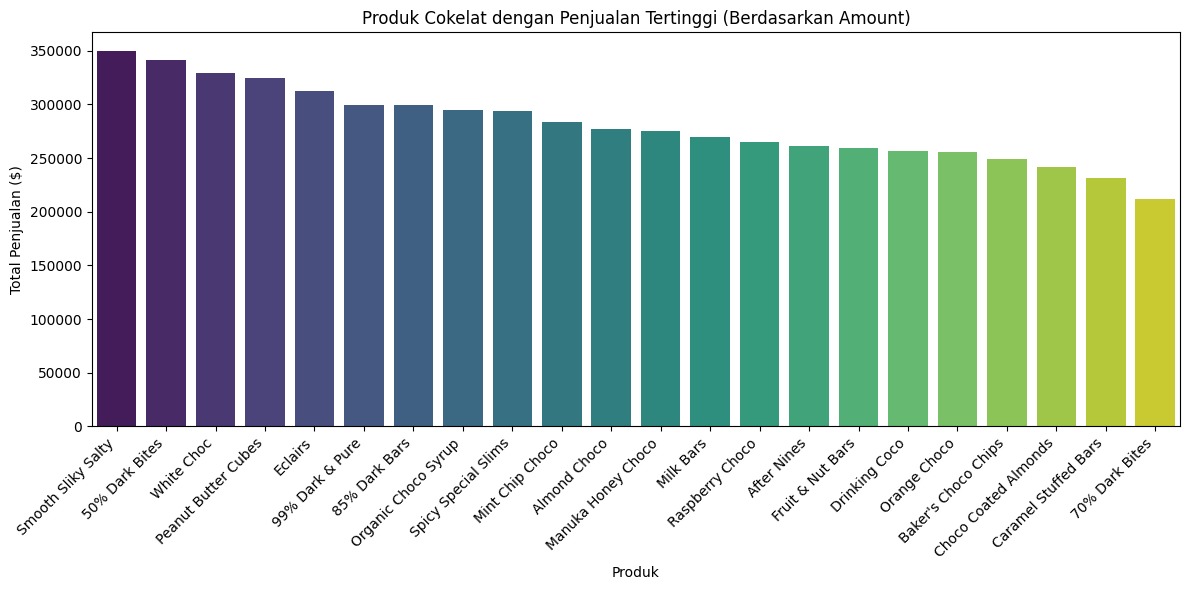

In [ ]:
# Mengelompokkan data berdasarkan produk dan menjumlahkan 'Amount'
produk_terlaris_amount = Choco_df.groupby('Product')['Amount'].sum().reset_index()

# Mengurutkan data berdasarkan 'Amount' secara menurun
produk_terlaris_amount = produk_terlaris_amount.sort_values(by=['Amount'], ascending=False)

# Mengatur ulang indeks
produk_terlaris_amount = produk_terlaris_amount.reset_index(drop=True)
produk_terlaris_amount.index = produk_terlaris_amount.index + 1

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Amount', data=produk_terlaris_amount, palette='viridis')
plt.title('Produk Cokelat dengan Penjualan Tertinggi (Berdasarkan Amount)')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan ($)')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()

**Insight:**
- xxx
- xxx

In [ ]:
# Simpan dataset hasil Analisis
Choco_df.to_csv("Dataset_Setelah_proses_Choco.csv", index=False)
print("\nDataset hasil Analisis telah disimpan sebagai 'Dataset_inisiasi.csv'.")


Dataset hasil Analisis telah disimpan sebagai 'Dataset_inisiasi.csv'.
